# Data Visualization - Part 2 : A deeper look at plot types and plotting.

In [1]:
# Import standard data visualization libraries
import seaborn as sns                         
from matplotlib import pyplot as plt

# Import standard computation libraries
import numpy as np
from scipy import stats
import pandas as pd

# Import standard data science library - contains data sets useful for learning.
from sklearn.datasets import load_iris


## Learning Goals

- Choose appropriate graph types based on data and problem context for explanatory visualizations
- Discuss the use of `matplotlib` syntax to create graphs and adjust elements
- To produce figures containing multiple graphs.

## Visualization Motivation: Why Visualize Data?

Why can’t we just hand someone a table of data?

Let's load up the iris data set.  This is a famous built-in dataset which is used to learn about categorization. 

In [2]:
data = load_iris()
df_iris = pd.DataFrame(data['data'], columns=data['feature_names'])
df_iris['target'] = data['target']

Here is an image of one of the virginica iris, which is unique in its relative petal and sepal length.

![virginica_iris](images/iris_virginica.jpg)

## Dataframe vs Graph: Which do you prefer?

In [7]:
df_iris.sample(5, random_state=42)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
73,6.1,2.8,4.7,1.2,1
18,5.7,3.8,1.7,0.3,0
118,7.7,2.6,6.9,2.3,2
78,6.0,2.9,4.5,1.5,1
76,6.8,2.8,4.8,1.4,1


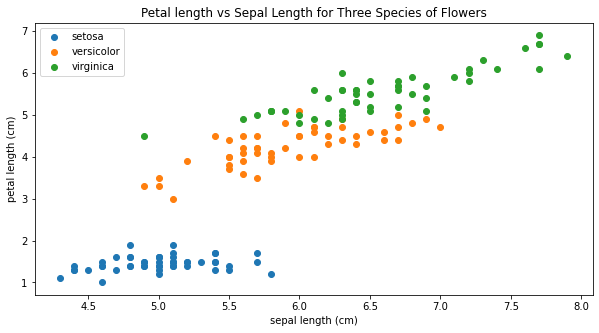

In [3]:
# plt.subplots() gives you two objects: fig - think of this as the white space behind any of the images/drawing
#                                        ax - think of this as the object that contains the drawings.

fig, ax = plt.subplots(figsize=(10, 5))

# Don't focus on the exact coding for now. we will get more into the syntax of pandas later.

# Iterate through each type of flower and plot them using different colors.
for flower in df_iris['target'].unique():
    subset_df = df_iris[df_iris['target'] == flower]
    x = subset_df['sepal length (cm)']
    y = subset_df['petal length (cm)']
    
    #data: x is the horizontal axis and y is the vertical. 
    ax.scatter(x, y, label=data['target_names'][flower])

# Label your axes! ** always a good practice to include units of measurment with your axes labels.
ax.set_ylabel('petal length (cm)')
ax.set_xlabel('sepal length (cm)')
ax.set_title('Petal length vs Sepal Length for Three Species of Flowers')
ax.legend();

**Thought experiment: What information in this graph jumps out to you?**

# Creating Data Visualization with `matplotlib`

There are [lots](https://python-graph-gallery.com) of different ways of plotting data! (See also [this page](https://datavizproject.com/).)

We will make heavy use of:

- bar plots
- box plots
- histograms
- line plots
- scatter plots

These can all be handled by `matplotlib` and `seaborn`. These packages are great for data that exists in `pandas` DataFrames (or `numpy` arrays), and so they will often be very useful for us.

## Anatomy of `matplotlib` Figure

<img src="images/matplotlib_anatomy.png">

Explanation of non-obvious terms:

__Figure__ - This is the "sheet of paper" all of your graphing sits on. 

__Axis__ - An axis is an individual plot. You can have multiple axes on one figure

__Major/Minor Ticks__ - The large and small dashes on the x and y axis

__Markers__ - In a scatter plot each of the points is refered to as a marker

__Spines__ - The lines that bound each axis

## Plotting Syntax

- There are many different ways to create plots but we will strongly suggest using the subplots method
    - Useful for extensibility 
    - Access to the figure and individual axis in a plot
    - More fine-grained control of customizing your plot
    - Easily create additional axis on your figure

Here are links to the [matplotlib documentation](https://matplotlib.org/index.html) as well as the [Axes object documentation](https://matplotlib.org/api/axes_api.html):

We will now walk through some common charts and their uses, while practicing our `matplotlib` syntax.

Let's read in some new data:

In [4]:
penguins = sns.load_dataset('penguins')

In [5]:
# pandas' method .head() gives you the first five lines of your dataset.
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Common Charts and Their Uses

#### Scatter Plots

Scatter plots are very common.  They allow one to visualize the relationship of two variables.

A scatter plot is a two-dimensional data visualization that uses individual data points to represent the values obtained for two different variables - one plotted along the x-axis and the other plotted along the y-axis. 

Scatter plots are used when you want to show the relationship between two variables. Scatter plots are sometimes called correlation plots because they show how two variables are correlated.

In the plots below, we see different correlations between variables:

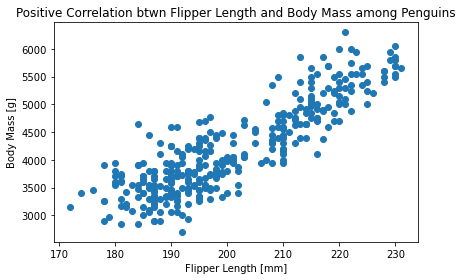

In [8]:
# This is the plotting syntax we recommend. Note that plt.subplots()
# returns a _double_: the figure object and the axis object.

fig, ax = plt.subplots()

ax.scatter(penguins['flipper_length_mm'], penguins['body_mass_g'])
ax.set_xlabel('Flipper Length [mm]')
ax.set_ylabel('Body Mass [g]')
ax.set_title('Positive Correlation btwn Flipper Length and Body Mass among Penguins')

plt.tight_layout()

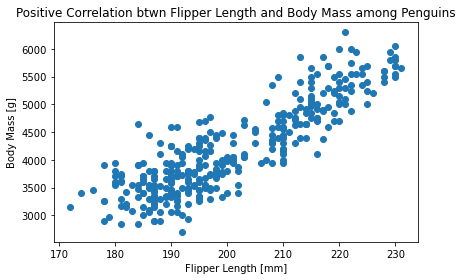

In [18]:
# You will also see this syntax, but it gives you less control over
# the plot! What similarities and differences do you see between
# this syntax and the subplots syntax?


# notice the arguments in .scatter() for x and y are missing. Plotting functions automatically understand the first argument is the x-data and the second is the y-data
# you can choose to be explicit by typing "x= <x_data>, y=<y_data>".
plt.scatter(penguins['flipper_length_mm'], penguins['body_mass_g'])
plt.xlabel('Flipper Length [mm]')
plt.ylabel('Body Mass [g]')
plt.title('Positive Correlation btwn Flipper Length and Body Mass among Penguins')
#plt.xlim(170,180)
#plt.ylim(1000,4500)

# tight_layout() is a function that controls the dimensions of the plotting area. 
plt.tight_layout()

We can also change [color](https://matplotlib.org/3.1.0/gallery/color/named_colors.html), opacity, marker size, and [marker symbol](https://matplotlib.org/3.2.1/api/markers_api.html).

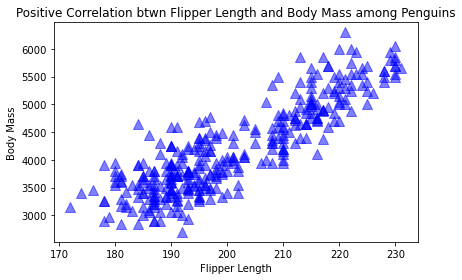

In [13]:
fig, ax = plt.subplots()

ax.scatter(x=penguins['flipper_length_mm'], y=penguins['body_mass_g'],
            c='blue',   # c gives the color of the marker or line.
            alpha=.5,   # the alpha argument controls opacity or how transparent the markers are.
            s=100,      # s gives the size of the marker
            marker='^') # marker gives the marker style.

ax.set_xlabel('Flipper Length')
ax.set_ylabel('Body Mass')
ax.set_title('Positive Correlation btwn Flipper Length and Body Mass among Penguins')


plt.tight_layout()

We can also identify colors by hexadecimal code, one each for the amount of red, green, and blue. Values range from '00' to 'ff'.

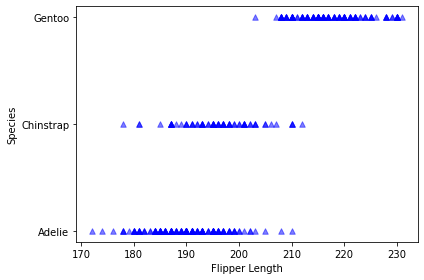

In [21]:
fig, ax = plt.subplots()

ax.scatter(x=penguins['flipper_length_mm'], y=penguins['species'],
            c='#0000ff',
            alpha=0.5,
            s=30,
            marker='^')

ax.set_xlabel('Flipper Length')
ax.set_ylabel('Species')

plt.tight_layout()

#### Line Plot

Tracks the change of a single variable over time.  They are generally better than bar graphs over shorter periods of time.

Here is some code to read in some well worn shampoo sales data over a three year period.

In [23]:
shampoo = pd.read_csv('data/sales-of-shampoo-over-a-three-ye.csv')[:-1]

shampoo.head(10)

,Month,Sales of shampoo over a three year period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


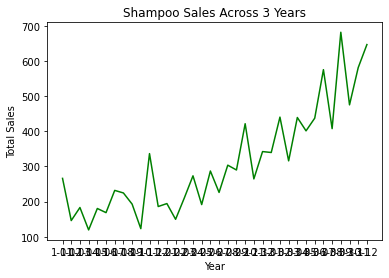

In [24]:
fig, ax = plt.subplots()
ax.plot(shampoo['Month'],
         shampoo['Sales of shampoo over a three year period'],
         color='g')
ax.set_title('Shampoo Sales Across 3 Years')
ax.set_xlabel('Year')
ax.set_ylabel('Total Sales');

The xticks are illegible in the plot above.

One way to combat that is to try [rotating](https://matplotlib.org/3.1.1/gallery/ticks_and_spines/ticklabels_rotation.html) the ticks.

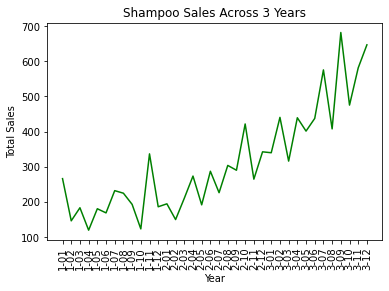

In [29]:
fig, ax = plt.subplots()  # Could also adjust figsize here!

ax.plot(shampoo['Month'],
         shampoo['Sales of shampoo over a three year period'],
         color='g')
ax.set_title('Shampoo Sales Across 3 Years')
ax.set_xlabel('Year')
ax.set_ylabel('Total Sales')
plt.xticks(shampoo['Month'],
                   rotation=90);

Maybe better is to make custom ticks:

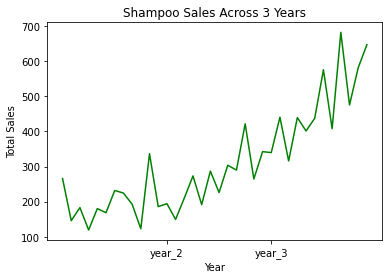

In [39]:
fig, ax = plt.subplots()

ax.plot(shampoo.index,
        shampoo['Sales of shampoo over a three year period'],
        color='g')
plt.xticks(range(12, 36, 12), labels=['year_2', 'year_3'])
ax.set_title('Shampoo Sales Across 3 Years')
ax.set_xlabel('Year')
ax.set_ylabel('Total Sales');

Lines have many [changeable properties](https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py/):

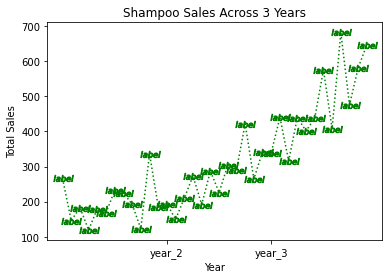

In [42]:
fig, ax = plt.subplots()

ax.plot(shampoo.index,
        shampoo['Sales of shampoo over a three year period'],
        
        # color
        c='g',
        
        # linestyle
        ls=':',
        
        # marker
        marker='$label$',
        
        # markersize
        ms=20)

plt.xticks(range(12, 36, 12), labels=['year_2', 'year_3'])
ax.set_title('Shampoo Sales Across 3 Years')
ax.set_xlabel('Year')
ax.set_ylabel('Total Sales');

#### Histograms

We will get get further into histograms in Phase 2, but it is good to get familiar with them sooner rather than later. 

Histograms create uniform bins across the entire range of a continuous variable. They then count the number of data points which fall into each bin.  

Histograms are often confused with bar charts, since they look somewhat similar.  The big difference, however, is that histograms visualize the distribution of a continuous variable, rather than the discrete variable shown by barcharts. You can remember this because the bins of histograms don't have spaces between them.

![histogram_ex](images/histogram_example.svg)

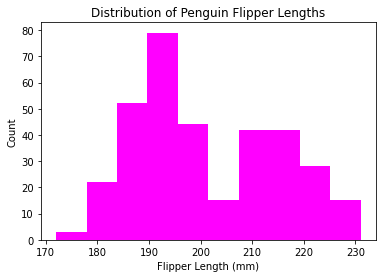

In [43]:
# Here is a histogram of flipper lengths from the Penguins Dataset

variable = penguins['flipper_length_mm'].dropna() # The '.dropna()' means
                                                  # that we'll ignore any
                                                  # missing values!

fig, ax = plt.subplots()
ax.hist(variable, color='magenta')
ax.set_xlabel('Flipper Length (mm)');
ax.set_ylabel('Count')
ax.set_title('Distribution of Penguin Flipper Lengths');

In [56]:
round(np.mean(variable),3)
#stats.mode(variable)

200.915

#### Box Plots

The scatter plot we made above of penguin species and flipper length would probably make more sense as a box plot.

Here we make a boxplot that shows the penguin flipper length distributions *per species*.

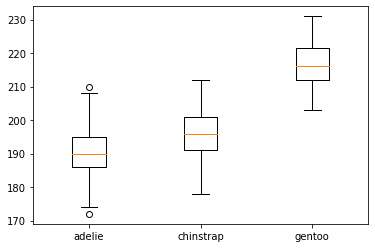

In [57]:
fig, ax = plt.subplots()

adelie = penguins[penguins['species'] == 'Adelie'].dropna()
chinstrap = penguins[penguins['species'] == 'Chinstrap'].dropna()
gentoo = penguins[penguins['species'] == 'Gentoo'].dropna()
flippers = [adelie['flipper_length_mm'],
            chinstrap['flipper_length_mm'],
           gentoo['flipper_length_mm']]

ax.boxplot(flippers, labels = ['adelie', 'chinstrap','gentoo']);

### Multiple Plots on a Single Axis

If we want to add multiple plots on one axis, we can simply call the plotting functions one after the other.

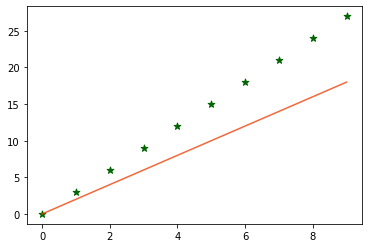

In [59]:
fig, ax = plt.subplots()

X = range(10)

Y1 = [2*x for x in X]
Y2 = [3*x for x in X]

ax.plot(X, Y1, c='#ef4209', alpha=0.8)
ax.scatter(X, Y2, c='darkgreen', marker='*', s=50);

## Adding Text and Annotations

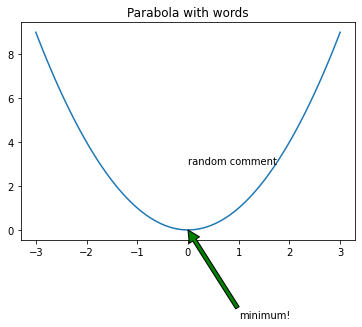

In [62]:
fig, ax = plt.subplots()

X = np.linspace(-3, 3, 100)
y = X**2
ax.plot(X, y)
ax.set_title('Parabola with words')
ax.text(s='random comment', x=0, y=3)
ax.annotate(text='minimum!', xy=(0, 0), xytext=(1, -4), 
           arrowprops={'facecolor': 'green'});       
                                                     

## Saving your figures

<ipython-input-63-f0bc7df43a1d>:10: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='minimum!', xy=(0, 0), xytext=(1, -4), # For newer versions of


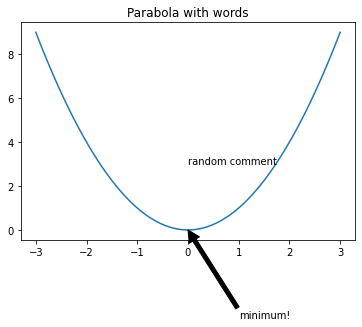

In [63]:
# If you have python and jupyter notebooks on your computer, you can save figures you create in an image file. 

fig, ax = plt.subplots()

X = np.linspace(-3, 3, 100)
y = X**2
ax.plot(X, y)
ax.set_title('Parabola with words')
ax.text(s='random comment', x=0, y=3)
ax.annotate(s='minimum!', xy=(0, 0), xytext=(1, -4), # For newer versions of
           arrowprops={'facecolor': 'black'});       # matplotlib replace 's'
                                                     # with 'text'!
# Let's save it!
plt.savefig('images/parabola.png')

Let's make sure the image has been saved!

# Multiple Plots (Axes)

Sometimes we want multiple plots to be a part of the same figure.

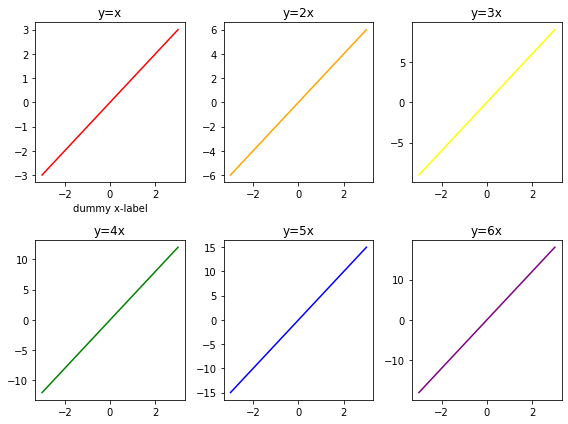

In [65]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))
# The above line gives me a figure with six subplots,
# arranged in two rows of three.

X = np.linspace(-3, 3, 100)
Ys = [[j*x for x in X] for j in range(1, 7)]

ax[0, 0].plot(X, Ys[0], c='red')
ax[0, 0].set_title('y=x')
ax[0, 0].set_xlabel('dummy x-label')

ax[0, 1].plot(X, Ys[1], c='orange')
ax[0, 1].set_title('y=2x')

ax[0, 2].plot(X, Ys[2], c='yellow')
ax[0, 2].set_title('y=3x')

ax[1, 0].plot(X, Ys[3], c='green')
ax[1, 0].set_title('y=4x')

ax[1, 1].plot(X, Ys[4], c='blue')
ax[1, 1].set_title('y=5x')

ax[1, 2].plot(X, Ys[5], c='purple')
ax[1, 2].set_title('y=6x')

plt.tight_layout()

## Customize Multiple Plot Grid

We can add some parameters to `plt.subplots()` that allow us to treat the different axes the same

In [ ]:
nrows = 2
ncols = 3
fig, ax = plt.subplots(
                nrows=nrows,
                ncols=ncols,
                figsize=(8, 6),
                sharey=True     # This allows for the y-axis to be consistent
)


Ys = [[j*x for x in X] for j in range(1, 7)]
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
n = 0

for r in range(nrows):
    for c in range(ncols):
        ax[r, c].plot(X, Ys[n], c=colors[n])
        ax[r, c].set_title(f'y={n+1}x')
        n += 1

plt.tight_layout()

In [ ]:
nrows = 2
ncols = 3
fig, ax = plt.subplots(
                nrows=nrows,
                ncols=ncols,
                figsize=(8, 6),
                sharey='row'    # y-axis to be consistent for each row
)


Ys = [[j*x for x in X] for j in range(1, 7)]
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
n = 0

for r in range(nrows):
    for c in range(ncols):
        ax[r, c].plot(X, Ys[n], c=colors[n])
        ax[r, c].set_title(f'y={n+1}x')
        n += 1

plt.tight_layout()

In [ ]:
nrows = 2
ncols = 3
fig, ax = plt.subplots(
                nrows=nrows,
                ncols=ncols,
                figsize=(8, 6),
                sharey='col'    # y-axis to be consistent for each column
)


Ys = [[j*x for x in X] for j in range(1, 7)]
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
n = 0

for r in range(nrows):
    for c in range(ncols):
        ax[r, c].plot(X, Ys[n], c=colors[n])
        ax[r, c].set_title(f'y={n+1}x')
        n += 1

plt.tight_layout()

# Seaborn

Seaborn is a wrapper around matplotlib which provides a high-level interface for drawing attractive and informative statistical graphics

[Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)

[List of Graphing Methods for Seaborn](https://seaborn.pydata.org/api.html#relational-api)

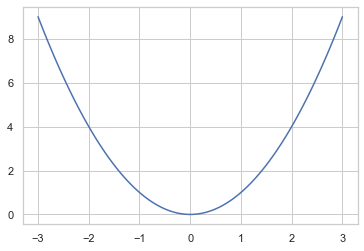

In [44]:
# The `style` parameter can be set equal to
# 'white', 'dark', 'whitegrid', 'darkgrid', or
# 'ticks'

sns.set(style='whitegrid')
fig, ax = plt.subplots()

X = np.linspace(-3, 3, 100)
y = X**2
ax.plot(X, y);

### Scatter Plot

In [ ]:
fig, ax = plt.subplots()

x, y = np.random.randn(2, 300)

# With Seaborn we can still use the subplots syntax by passing our
# axis object into the graphing function

sns.scatterplot(x=x, y=y, ax=ax)
ax.set_ylabel('Cars')
ax.set_xlabel('Number of Office Chairs');

# The Effectiveness of Visualizations

- People are highly visual and can synthesize visual information much more quickly than rows and columns of numbers 
- Precognitive understanding of the data
- Visual representations can be much more viscerally persuasive 
- Visuals can help us identify patterns in the data to investigate

## What Makes an Effective Visualization?

Today, we want to focus on making data visualizations that an audience can easily comprehend and digest. These visualizations are typically referred to as **explanatory** visualizations. 

Our goal in explanatory visualizations is to convey/communicate your insight(s) effectively to our audience. That audience can be other data scientist but could also be stakeholders unfamiliar with data analysis or statistical concepts.

> **NOTE**
>
> There are visualizations that have the goal in helping us (data scientists) better understand the data as we explore it. These are usually referred to as **exploratory** visualizations. These types of visualizations don't usually have to be as clean and tidy as _explanatory_ visualizations.

- Each graph should have a clear point it is trying to make. Understanding the insight you are trying to convey will guide the decision making process for what kind of graph will be most effective

- Know your audience! Come up with a use case and audience to pitch your visualizations

- Choosing the correct graph for the relationship you are trying to communicate

- Label your axes and graph! It should not be difficult for someone to understand what your graph is trying to represent

- People have unconscious responses to visuals which will effect the way they interpret information. Good visualization makes use of these natural shortcuts in cognition to convey information more efficiently
    - Red and Down tends to be negative while Green and Up is positive
    - Lighter hues are seen as lower values and darker is higher values
    - Axis start at zero
        
__Note:__ All of these 'rules' can be broken but know that you will be working against most people's first instinct

## Anatomy of Visualizations

### Length & Size

> Showing the effect (careful about area....)

+ Bar charts
+ Stacked bar charts
+ Scatter plot

![](https://seaborn.pydata.org/_images/seaborn-barplot-111.png)

![](http://thedailyviz.com/wp-content/uploads/2012/08/guns-620x415.png')

![](https://seaborn.pydata.org/_images/scatterplot_19_0.png)

### Color

> To draw specific findings (contrast)

+ Scatter plots
+ Bar charts (sometimes....)

![](https://seaborn.pydata.org/_images/scatterplot_13_0.png)
![](https://seaborn.pydata.org/_images/seaborn-barplot-10.png)

### Shape

> Distinguish different points

![](https://seaborn.pydata.org/_images/scatterplot_9_0.png)

### Angle 

> ***DON'T USE THIS!!!*** Usually prone to lots of misinterpretations

+ Pie Chart 🤬
+ Donut Chart (pie charts in disguise!)
+ Racetrack Chart

![](https://static1.squarespace.com/static/55b6a6dce4b089e11621d3ed/55b6d08fe4b0d8b921b02f83/55b6d0b6e4b0d8b921b03a36/1438044342911/1000w/)


![](https://policyviz.com/wp-content/uploads/2018/02/share-of-us-agricultural-exports-value-01-1140x700.png)


![](https://i.stack.imgur.com/w4sB9.png)

## What Types Work Well Consistently

Experts and researchers found the best visual patterns humans identify well:

> - Positional changes (scatter plots)
> - Length changes (bar charts)

But we're bad at understanding other patterns...

> - Color hue changes 
> - Area changes (pie charts!)

## How to Lie with Graphs

- Graphs can be misleading
- Consciously or unconsciously people will make decisions to lead people towards their conclusions of the data

- Examples of dark patterns
    - Changing the axis scale
    - Using two different y axis scales to compare trends
    - Showing cumulative data which will always be increasing to hide a downturn in a trend
    - Pie charts (comparing degrees is not something people are good at) just use a bar chart
    - Inconsistent units
    - Not showing all of the data for motivated reasons
    - Percentages not adding up to 100

<img src="images/pie-chart-misleading.png">

image: http://flowingdata.com/2009/11/26/fox-news-makes-the-best-pie-chart-ever/